This is a study of how Fitzalan High School compares to other high schools in Cardiff. Fitzalan High School is the local high school for the area in which the South Riverside Community Development Center (SRCDC) operates. That is the Grangetown, Canton, and Riverside areas in Cardiff. All the data I use is taken from the my local schools Wales website (http://mylocalschool.gov.wales/School/6814042?lang=en).

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import my_local_school_webscraping as mls

In [2]:
local_schools = ['Fitzalan High School']

First we need to get the URL to the Fitzlan High School webpage.

In [3]:
schoolURL_dict = mls.make_school_URL_dict_from_list(local_schools)

We start by looking at the summary statistics for this school. We put the data into a pandas dataframe to make it easier to view.

In [4]:
local_school_dict = {}
for school in local_schools:
    local_school_dict[school] = mls.make_stat_dict(schoolURL_dict[school])
local_school_df = pd.DataFrame.from_dict(local_school_dict, orient='index')

In [5]:
local_school_df

,Number of Pupils 2017,Free school meals FSM 3 year average Secondary only(%),Pupil Teacher Ratio PTR Secondary only,Attendance during the year Secondary only(%),School budget per pupil,Support Category,Pupils who have reached the expected level Core subject indicator Key Stage 3(%),Pupils achieving the level 2 threshold including EnglishWelsh and Maths Key Stage 4(%),Average capped 8 points score Key Stage 4,Average capped 9 points score Key Stage 4,of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%),Average number of minutes per week allocated for curricular PE Secondary only
Fitzalan High School,1712.0,31.5,14.9,94.6,4833.0,Green,81.1,54.2,355.3,378.1,55.0,35.0,96.0


Now we make a dataframe containing the summary information for every secondary school in Cardiff.

In [6]:
secondary_school_URLs = mls.make_district_school_URLdict_by_type('Cardiff',schools=['Secondary'])

In [7]:
cardiff_secondary_school_dict = {}
for school in secondary_school_URLs.keys():
    cardiff_secondary_school_dict[school] = mls.make_stat_dict(secondary_school_URLs[school])
cardiff_secondary_school_df = pd.DataFrame.from_dict(cardiff_secondary_school_dict, orient='index')

Comparing Fitzalan school to the summary information for Cardiff below, we can see that it is one of the largest schools in Cardiff in terms of number of pupils. In fact it is the second biggest school in Cardiff. It is also in the bottom quartile for KS3 performance, and below median for Cardiff for KS4. It has a higher than median ratio of students on free school meals as well.

In [8]:
cardiff_secondary_school_df.describe()

,Number of Pupils 2017,Free school meals FSM 3 year average Secondary only(%),Pupil Teacher Ratio PTR Secondary only,Attendance during the year Secondary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 3(%),Pupils achieving the level 2 threshold including EnglishWelsh and Maths Key Stage 4(%),Average capped 8 points score Key Stage 4,Average capped 9 points score Key Stage 4,of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%),Average number of minutes per week allocated for curricular PE Secondary only
count,19.000000,19.000000,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000,19.000000,9.000000,9.000000,11.000000
mean,1041.631579,23.631579,28.947368,93.542105,5231.700000,84.236842,55.926316,333.810526,356.610526,53.333333,48.000000,96.272727
std,517.069543,14.659243,59.608094,2.766730,736.437877,15.995528,19.597133,53.412971,62.214895,5.722762,9.974969,16.637854
min,204.000000,6.400000,11.600000,87.000000,4344.000000,41.100000,15.900000,200.000000,207.400000,46.000000,35.000000,78.000000
25%,627.000000,10.150000,14.300000,92.600000,4684.000000,81.200000,45.500000,329.050000,344.950000,49.000000,40.000000,81.500000
50%,1050.000000,23.500000,15.300000,94.400000,4932.500000,88.900000,55.600000,351.300000,378.000000,53.000000,47.000000,96.000000
75%,1353.500000,34.400000,16.600000,95.300000,5742.000000,94.400000,71.200000,360.300000,393.850000,56.000000,54.000000,108.000000
max,2255.000000,46.400000,275.000000,96.700000,7177.000000,98.300000,84.800000,393.800000,430.000000,62.000000,62.000000,120.000000


We make a list here of non-local high schools (that is Cardiff schools that aren't Fitzalan). This will allow us to later compare the local school to others in Cardiff more easily.

In [9]:
non_local_school = [school for school in cardiff_secondary_school_df.index.values if school not in local_schools]

As we want to study the level of deprivation in the area, we will start by looking at free school meals (FSM). The my local schools website only lists the percentage of students on FSM, so we multiply this by the number of students to get an approximate number of FSM students. Due to rounding erros, this is not exact.

In [10]:
cardiff_fsm_students = (cardiff_secondary_school_df['Free school meals FSM  3 year average Secondary only(%)']\
                                                * cardiff_secondary_school_df['Number of Pupils 2017']).dropna()

Below we plot the number of FSM students at each high school in Cardiff. As you can see, the number of FSM students at the local high school is much higher than any other school in Cardiff. Other schools have a higher ratio of FSM students, but these schools are much smaller, so the total number is higher at Fitzalan. 

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


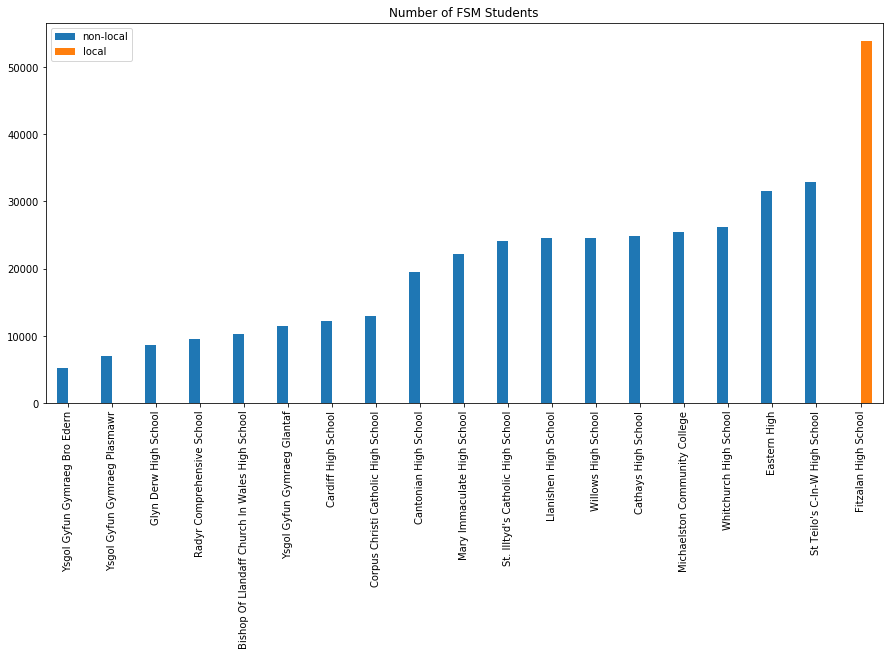

In [28]:
order = cardiff_fsm_students.dropna().sort_values().keys()
local_nonlocal_fsm = pd.concat([cardiff_fsm_students[non_local_school].dropna(),cardiff_fsm_students[local_schools]],\
                                                                                    axis=1,keys=['non-local','local'])
local_nonlocal_fsm.set_index(cardiff_fsm_students.keys()).loc[order].plot(kind='bar',title="Number of FSM Students",figsize=(15,7))

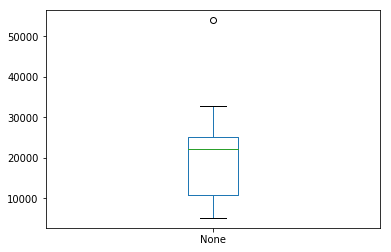

In [12]:
cardiff_fsm_students.plot(kind='box')

Here we plot the number of FSM students in the local area as opposed to the whole of Cardiff. About 14% of all FSM students in Cardiff are in the local area, even though only about 9% of secondary school studetns in Cardiff are from the area.  

In [13]:
local_nonlocal_fsm.sum()['local']/local_nonlocal_fsm.sum().sum()

0.13940582429303142

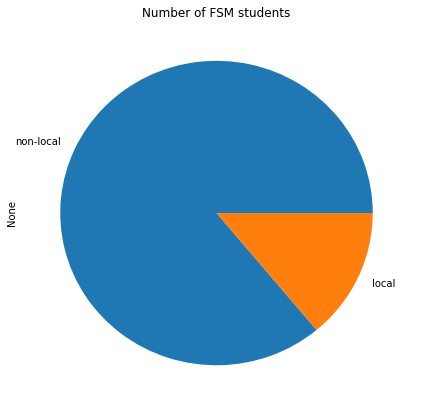

In [14]:
local_nonlocal_fsm.sum().plot(kind='pie',figsize=(7,7),title='Number of FSM students')

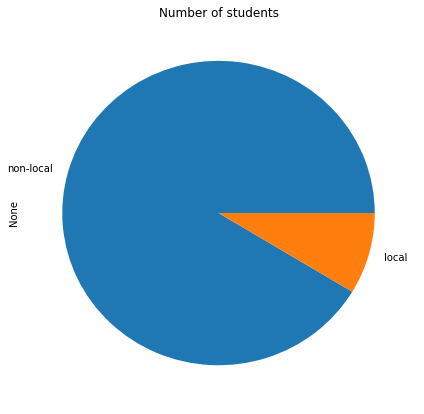

In [15]:
local_nonlocal_students = pd.concat([cardiff_secondary_school_df['Number of Pupils 2017'][non_local_school],\
           cardiff_secondary_school_df['Number of Pupils 2017'][local_schools]],\
          keys=['non-local','local'], axis=1).sum()
local_nonlocal_students.plot(kind='pie',figsize=(7,7),title='Number of students')

In [16]:
local_nonlocal_students['local']/local_nonlocal_students.sum()

0.08650396644939619

Now we look at the data for Special Educational Needs and English as an Additonal Language. The number of special needs students in the area indicates the level of deprivation. The number of students who don't speak English as a first language indicates how necessary the English classes run by SRCDC are to the local area.

These are the table ids for the Special Educational Needs (SEN) and English as an Additional Language (EAL) tables. 

In [17]:
sen_table_id = 'atbl304'
eal_table_id = 'atbl305'

Starting with SEN, we load the data for each school. We then look at the school action statistic, i.e. The percentage of students that the school has had to make special provisions for. 

In [18]:
sen_dict = {}
for school in secondary_school_URLs.keys():
    sen_dict[school] = mls.load_table_into_dataFrame(secondary_school_URLs[school],sen_table_id)
    if not len(sen_dict[school]):
        del sen_dict[school]

In [19]:
school_action_dict = {}
for school in sen_dict.keys():
    school_action_dict[school] = sen_dict[school].loc['School - School Action']
school_action_df = pd.DataFrame.from_dict(school_action_dict,orient='index') 
local_school_action_df = school_action_df.loc[local_schools]

Again, we multiply by the number of students to get an approximate number of SEN students.

In [20]:
number_local_sen_students = local_school_df['Number of Pupils 2017']*school_action_df.loc[local_schools,2017]/100
number_cardiff_sen_students = cardiff_secondary_school_df['Number of Pupils 2017']*school_action_df.loc[:,2017]/100

Plotting this data below, we see that Fitzalan has the highest or (due to rounding errors) second highest number of Special Needs students in Cardiff. This is because schools with a higher ratio of SEN students have far fewer students. 

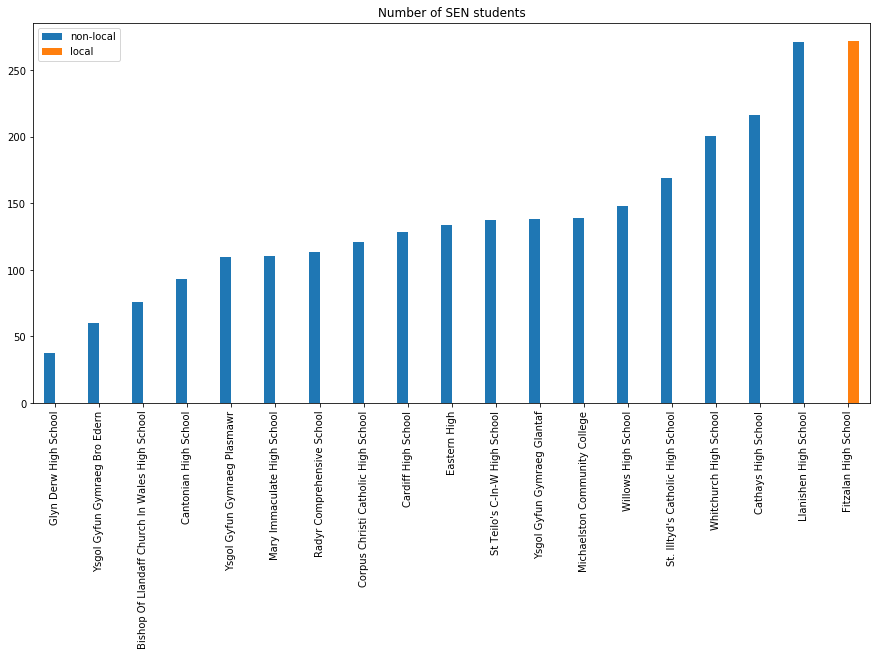

In [21]:
order = number_cardiff_sen_students.dropna().sort_values().keys()
local_nonlocal_sen = pd.concat([number_cardiff_sen_students[non_local_school],number_cardiff_sen_students[local_schools]],\
                                                                                    axis=1,keys=['non-local','local'])
local_nonlocal_sen.set_index(number_cardiff_sen_students.keys()).loc[order].plot(kind='bar',title='Number of SEN students',figsize=(15,7))

Now we look at the number of students who speak English as an Additional Language.

In [22]:
eal_dict = {}
for school in secondary_school_URLs.keys():
    temp = mls.load_table_into_dataFrame(secondary_school_URLs[school],eal_table_id)
    try:
        eal_dict[school] = temp.loc['School']
    except (KeyError, AttributeError):
        continue

eal_df = pd.DataFrame.from_dict(eal_dict,orient='index')

Here we are finding the number of students from the percentage of EAL students and the total number of students.

In [23]:
num_eal_students_local = (cardiff_secondary_school_df['Number of Pupils 2017']*eal_df.loc[:,2017]/100)[local_schools]
num_eal_students_cardiff = (cardiff_secondary_school_df['Number of Pupils 2017']*eal_df.loc[:,2017]/100)

The box plot below shows that Fitzalan has by far the most EAL students in Cardiff (almost a factor of 2 more than the second most).

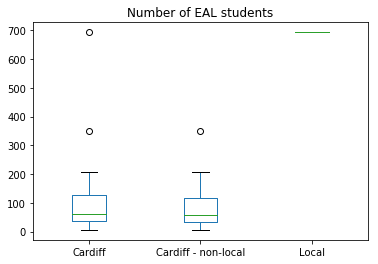

In [24]:
(pd.concat([num_eal_students_cardiff, num_eal_students_cardiff[non_local_school], num_eal_students_local]\
           ,axis=1,keys=['Cardiff','Cardiff - non-local','Local'])).plot(kind='box',title='Number of EAL students')

The bar chart below shows the same information in a different format.

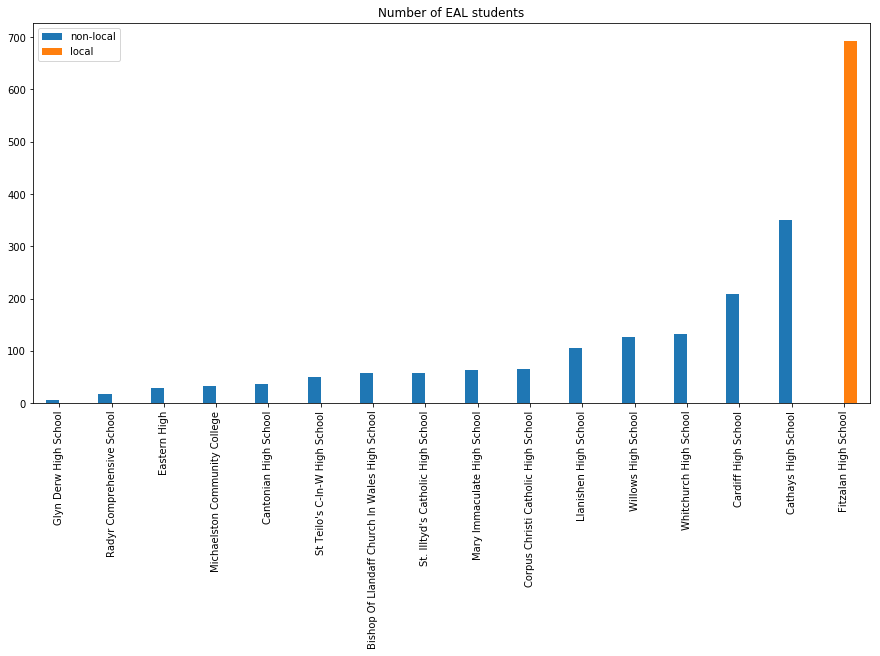

In [25]:
order = num_eal_students_cardiff.dropna().sort_values().keys()

local_nonlocal_eal = pd.concat([num_eal_students_cardiff[non_local_school],num_eal_students_cardiff[local_schools]],\
                                                                                    axis=1,keys=['non-local','local'])
local_nonlocal_eal.set_index(num_eal_students_cardiff.keys()).loc[order].plot(kind='bar',title='Number of EAL students',figsize=(15,7))

Here we show the ratio of EAL students in the local area vs the rest of Cardiff. About 1 in 3 EAL students in Cardiff go to Fitzalan school.

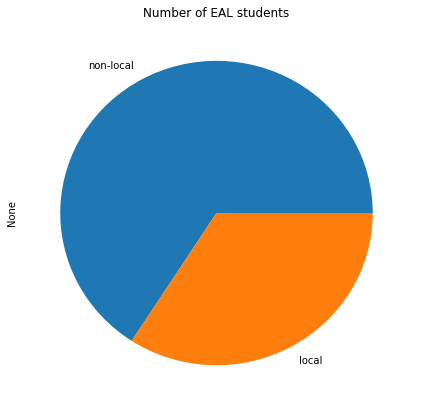

In [26]:
local_nonlocal_eal.sum().plot(kind='pie',figsize=(7,7),title='Number of EAL students')

In [27]:
local_nonlocal_eal.sum()/local_nonlocal_eal.sum().sum()

non-local    0.658646
local        0.341354
dtype: float64